# 3. Datan valitseminen histogrammiin

Tässä harjoituksessa käytämme CMS-detektorin keräämää dataa törmäyksistä, joissa on havaittu kaksi myonia, joiden invariantti massa on välillä 60-120 GeV [1]. Data sisältää 10851 törmäystapahtumaa, joissa myonien invariantti massa on valmiiksi laskettu. __Tämän harjoituksen tarkoituksena on tarkastella, miten valitun datan määrä vaikuttaa piirtämäämme histogrammiin.__

[1] CMS collaboration (2016). DoubleMu primary dataset in AOD format from RunA of 2011 (/DoubleMu/Run2011A-12Oct2013-v1/AOD). CERN Open Data Portal. DOI: [10.7483/OPENDATA.CMS.RZ34.QR6N](http://doi.org/10.7483/OPENDATA.CMS.RZ34.QR6N).

## 1) Tiedoston lukeminen

> - Tuo moduulit pandas, numpy ja matplotlib.pylab, käytä lyhenteitä pd, np ja plt
<br>
> - Lue datatiedosto pandas-moduulin avulla. Tallenna tiedot muuttujaan _datasetti_ Tiedoston polku on *'https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/Zmumu_Run2011A_massoilla.csv'*
<br>
> - Tallenna invariantti massa muuttujaan *invariantti_massa*
<br>
$\color{purple}{\text{Kirjoita koodi alle.}}$

In [3]:
# Tuo moduulit pandas, numpy ja matplotlib.pylab käyttäen import-komentoa


# Lue datatiedosto ja tallenna tiedot muuttujaan 'datasetti'


# Tallenna invariantti massa muuttujaan 'invariantti_massa'



## 2) Valitaan käytetyn datan määrä

Alla oleva koodi kysyy käyttäjältä, kuinka monta tapahtumaa valitaan piirrettäväksi ja piirtää histogrammin valittujen tapahtumien invarianteista massoista. Voit ajaa koodisolun uudelleen, jolloin saat valita tapahtumien määrän uudelleen. Voit vain ajaa koodisolun kiinnittämättä sen enempää huomiota koodin sisältöön. Jos koodin sisältö kuitenkin kiinnostaa, niin koodin kommentit kertovat, mitä kullakin rivillä on tehty.

Tutki koodin avulla seuraavia asioita:
1. Miten valitun datan määrä vaikuttaa histogrammiin?
2. Mitä invariantin massan arvoa datasta löytyy eniten?
3. Mitä voit päätellä kohdan 2 vastauksestasi?

Bonus: Mitä tapahtuu, jos valitset esimerkiksi 20000 tapahtumaa piirrettäväksi? Miksi?

Kuinka monta tapahtumaa valitaan:  10000



 Valitsit datasta 10000 invariantin massan arvoa.


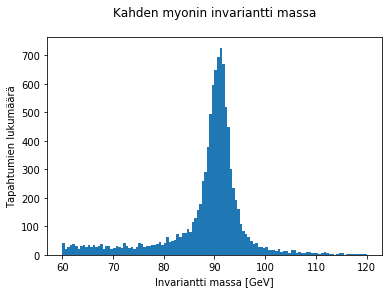

In [4]:
# Luodaan tyhjä lista 'valitut', johon tallennetaan valittujen invarianttien massojen arvot.
valitut = []

# Pyydetään käyttäjää valitsemaan tapahtumien lukumäärä. Tallennetaan luku muuttujaan 'määrä'.
määrä = int(input('Kuinka monta tapahtumaa valitaan: '))

# Tarkastetaan, onko datassa tarpeeksi tapahtumia. Jos tapahtumia ei ole tarpeeksi, tulostetaan virheilmoitus.
# Muussa tapauksessa massat valitaan ja tallennetaan 'valitut'-listaan.
if määrä > len(invariantti_massa):
    print('Virhe: Histogrammin piirto epäonnistui. Ei tarpeeksi dataa. Maksimimäärä tapahtumia on ' + str(len(invariantti_massa)) + '.')
else:
    for f in range(määrä):
        M = invariantti_massa[f]
        valitut.append(M)
    print('\n Valitsit datasta {} invariantin massan arvoa.'.format(määrä))

# Piirretään histogrammi valitusta datamäärästä. Valitaan pylväiden lukumäärä 'bins' sekä x-akselin väli 'range'.
plt.hist(valitut, bins=120, range=(60,120))

# Nimetään akselit ja annetaan histogrammille otsikko.
plt.xlabel('Invariantti massa [GeV]')
plt.ylabel('Tapahtumien lukumäärä')
plt.title('Kahden myonin invariantti massa\n')

# Tyhjennetään lista 'valitut' seuraavaa ajoa varten.
valitut = []

## 3) Animaatio histogrammista, kun datan määrä kasvaa

Alla oleva koodi luo animaation, jossa histogrammiin lisätään dataa. Tässä kohtaa ei tarvitse ymmärtää, mitä koodisolujen tekstit tarkoittavat.

Pohdi animaation perusteella, mikä merkitys on käytetyn datan määrällä on.
Aja kaikki alla olevat solut ja odota nähdäksesi animaation.

__Huom!__ Solujen ajaminen voi kestää useita minuutteja, joten ole kärsivällinen.

In [7]:
import matplotlib.animation
from scipy.stats import norm

def updt_hist(num, invariantti_massa):
    plt.cla()
    axes = plt.gca()
    plt.hist(invariantti_massa[:num*25], bins = 150)

In [8]:
%%capture

fig = plt.figure(figsize=(15,10))
anim = matplotlib.animation.FuncAnimation(fig, updt_hist, frames = 100, fargs = (invariantti_massa,))

from IPython.display import HTML
HTML(anim.to_jshtml())

In [9]:
HTML(anim.to_jshtml())